# Face cluster with pirincipal component analysis

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from skimage.io import imshow
from sklearn.decomposition import PCA

### Read data

In [45]:
def show_images(data, count=8):
    plt.figure()
    for i in range(count):
        plt.subplot(1, count, i + 1)
        plt.imshow(data[i])   

(400, 64, 64)
[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
 [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
 [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
 ...
 [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
 [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
 [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]


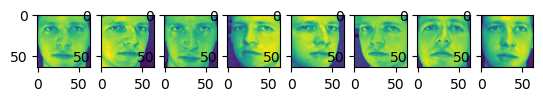

In [34]:
data = np.load('./data/face_cluster/olivetti_faces.npy')
print(data.shape)
print(data[0])
# fig, axes =plt.subplots(1, 8)
# for i, ax in enumerate(axes.flat):
    # ax.imshow(data[i + 100])
show_images(data, 8)    


### Reshape data

In [35]:
h = data.shape[1]
w = data.shape[2]
count = data.shape[0]
faces_data = data.reshape(count, h*w)
faces_data.shape


(400, 4096)

### Train model

In [36]:
n_components = 100

# use sklearn pca to reduce dimensionality
# def face_pca(faces, n_components):

pca = PCA(n_components=n_components)
pca.fit(faces_data)

print(pca.components_.shape)
eigen_faces = pca.components_.reshape(n_components, h, w)
print(eigen_faces.shape)
# show_images(eigen_faces)

faces_pca = pca.transform(faces_data)
print(faces_pca.shape)
print(faces_pca[0])
# show_images(faces_pca)



(100, 4096)
(100, 64, 64)
(400, 100)
[-6.43261337e+00 -7.03671098e-01 -1.43002260e+00  1.27853346e+00
  2.56439614e+00 -9.50602055e-01  2.08175087e+00 -2.93795586e+00
 -3.73873979e-01  2.43109390e-01 -1.35431051e+00  1.17256749e+00
  3.92082989e-01  3.58200938e-01  7.54203856e-01  2.70380050e-01
  5.14707625e-01 -5.96428394e-01 -1.55798152e-01 -2.83123255e-01
  1.35527790e-01  7.36054182e-01 -1.24732599e-01  4.25915718e-01
  4.99448031e-01 -5.08010209e-01  7.12916255e-01 -1.49564832e-01
 -2.98191980e-02  5.98624587e-01 -5.10318577e-01  3.41450393e-01
 -8.96979719e-02  8.14886808e-01  1.35479942e-01 -1.84597582e-01
 -3.11702460e-01 -5.69197774e-01 -3.94370288e-01  5.03916919e-01
  2.75032192e-01  1.81718379e-01  1.76259428e-02  5.62931895e-01
 -4.77851391e-01  2.78957129e-01 -3.04699361e-01  2.79963940e-01
  2.55372494e-01  5.98488629e-01  3.67871344e-01 -1.03480034e-01
 -1.77722663e-01  7.16574416e-02  8.33376646e-02 -3.92785668e-01
  9.72030878e-01  3.86524945e-02 -9.58700404e-02 -1.5

### Handwrite model

In [37]:
# fit()
     
    # randomly pick data centers for the n samples
    # foeach data point, find the nearest data center
        # calculate the distance between the data point and the nearest data center
    # repick data centers
        # calculate the new data center by averaging the data point and the nearest data center

    # termination.
    #   1) hit max iteration 2) no data center change
class KMeans(object):
    def __init__(self, k, max_iter = 100):
        self.k = k
        self.cluster_centers = None
        self.labels = None        
        self.max_iter = max_iter

    def fit(self, X):
        """
        K-means clustering algorithm.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
        k : int. component count
        max_iter : int, default=100
        Returns
        -------
        labels : array-like, shape (n_samples,)
        centers : array-like, shape (k, n_features)
        """
        n_samples, n_features = X.shape
        self.cluster_centers = X[np.random.choice(n_samples, self.k, replace=False)]
        cluster_center_assignment = np.zeros(n_samples) # initialize cluster_center_assignment of data points to which data center belongs
        distances_sample = np.full(n_samples, np.inf)
        
        for i in range(self.max_iter):
            cluster_center_change = False
            for j in range(n_samples): # calculate the distance between each data point to all the data centers
                distances = np.linalg.norm(X[j] - self.cluster_centers, axis=1) # distance using img data 
                min_dis = np.min(distances)
                min_index = np.argmin(distances)
                if cluster_center_assignment[j] != min_index and min_dis < distances_sample[j] :
                    cluster_center_assignment[j] = min_index
                    distances_sample[j] = min_dis
                    cluster_center_change = True
            if not cluster_center_change:
                break
            # calculate the new center
            self.cluster_centers = np.mean(X[cluster_center_assignment == np.arange(self.k)], axis=0)

        return cluster_center_assignment, self.cluster_centers

cluster_num = 39
model = KMeans(k=cluster_num)
assignments, centers = model.fit(faces_data)
   

C:\Users\Michael\AppData\Local\Temp\ipykernel_2344\2161567475.py:48: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  self.centers = np.mean(X[data_center_assignment == np.arange(self.k)], axis=0)
c:\Users\Michael\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Michael\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


cluster: 0
cluster: 1
cluster: 2


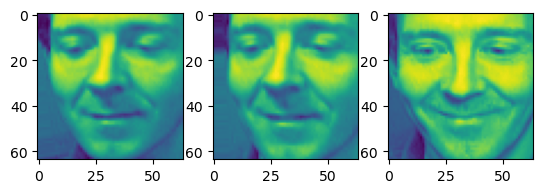

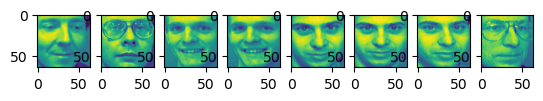

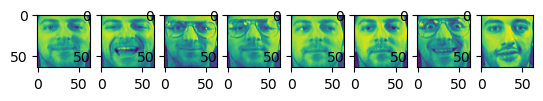

In [46]:
for cluster_index in range(min(3, cluster_num)):
    # indexes = np.nonzero(assignments==cluster_index)
    face_this_cluster = data[assignments==cluster_index]
    print(f'cluster: {cluster_index}')
    show_images(face_this_cluster, min(len(face_this_cluster),8))  



### Output

In [38]:
np.unique(assignments)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.])

In [ ]:

# df = pd.DataFrame()
# df.to_csv('submission.csv',index = False, header=True)